# Lab05 Exercises #1

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean  

## Objectives
* Learn how to inspect, read and write raster data
* Develop a more intuitive understanding of raster transforms, window/extent operations
* Understand raster visualization approaches, contrast stretching and interpolation settings
* Perform common raster band math operations (e.g., NDVI) using NumPy
* Perform quantitative raster analysis using value thresholds and binary masks
* Understand programmtic Landsat-8 archive access and download

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import rasterio as rio
import rasterio.plot
from osgeo import gdal

#Useful package to add dynamic scalebar to matplotlib images
from matplotlib_scalebar.scalebar import ScaleBar

## Part 0: Run Landsat data download notebook, set path to data directory
* 05_Raster1_LS8_download.ipynb

In [ ]:
pwd

'/home/jovyan/src/gda_course_2023_solutions/modules/05_Raster1_GDAL_rasterio_LS8'

In [ ]:
#Open accompanying notebook and Run All Cells
#Alternatively, can run from this notebook, which should preserve variables/state
#%run ./05_Raster1_LS8_download.ipynb

In [ ]:
#Set path to local directory with downloaded images
imgdir = '/home/jovyan/jupyterbook/book/modules/05_Raster1_GDAL_rasterio_LS8/LS8_sample'

In [ ]:
#Pre-identified cloud-free Image IDs used for the lab
#Summer 2018
img_id1 = 'LC08_L2SP_046027_20180818_20200831_02_T1'
#Winter 2018
img_id2 = 'LC08_L2SP_046027_20181224_20200829_02_T1'

In [ ]:
#Define image to use (can set this to switch to winter image)
img = img_id1

In [ ]:
#Red band filename
r_fn = os.path.join(imgdir, img+'_SR_B4.TIF')

## Part 1: Raster basics

### Open the downloaded image from disk
* Since we already downloaded these images locally, let's just open a local file
* Let's use of the red band (B4) TIF file
    * We already defined the `r_fn` above, so this should be easy
* Don't use the `with` construct - store the opened dataset in a variable, so we can use in other cells

In [ ]:
print(r_fn)
src = rio.open(r_fn)

### What is the CRS of the dataset?
* Look familiar?  The `fiona` functionality underlying `rasterio` (also used by `geopandas`) was mostly written by the same author (Sean Gilles, https://github.com/sgillies). 
* If you don't recognize it by now, take a minute to look up this EPSG code

In [ ]:
#Student Exercise

### What is the raster extent (bounds) of the dataset in projected coordinates?
* Note that this is not a simple python `list` object, but a special rasterio [`BoundingBox` object](https://rasterio.readthedocs.io/en/latest/api/rasterio.coords.html#rasterio.coords.BoundingBox) with attributes for `left`, `bottom`, etc.
    * This helps you avoid mixing up order of values that correspond to `(min_x, min_y, max_x, max_y)`
    * Note that other API and utilities may use different order (e.g., `min_x, max_x, min_y, max_y`)

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

### How many bands are there in this dataset?
* Check the approprate rasterio dataset attribute

In [ ]:
#Student Exercise

### Review the profile and metadata record
* Inspect the rasterio `profile` and `meta` attributes, which should return dictionaries for all metadata

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

### OK, let's read the raster data into a NumPy array and preview
* Store the output array as a new variable called `r`
* Use default read options for now, don't read as masked array
* What band number should we use here? 
    * This dataset is for the red Landsat multispectral band, which is band #4 (B4)
    * But each Landsat band is stored as a separate TIF file (remember your dataset band `count` attribute above)
    * So using rasterio `read`, which band do you need to load?
    * Note: If you omit the band number, rasterio will return a 3D NumPy array with an additional dimension

In [ ]:
#Student Exercise

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

### What are the dimensions of the NumPy array?  
* Compare this with the rasterio dataset `width` and `height` attributes
    * Look carefully, as these are slightly different
    * Hopefully this offers a reminder about the ordering of NumPy indices, with (row, col) representing (y,x) dimensions

In [ ]:
#Student Exercise

### What is the uncompressed filesize of this array in Megabytes?
* You can compute this using the array data type and dimensions
    * Can check with the NumPy array `nbytes` attribute
* This is how much RAM the array is occupying after the read operation
* How does this compare with the file size of this file on disk (see output from `ls -alh`)?
    * If different, why might they be different? ✍️

In [ ]:
!ls -lah $r_fn

-rw-rw-r-- 1 jovyan users 83M Feb  1 04:03 /home/jovyan/jupyterbook/book/modules/05_Raster1_GDAL_rasterio_LS8/LS8_sample/LC08_L2SP_046027_20180818_20200831_02_T1_SR_B4.TIF


In [ ]:
#Student Exercise

#Student Exercise

### Create a plot of the image
* Earlier we used the `rio.plot.show()` convenience function for plotting a dataset, which is a wrapper around the standard matplotlib `imshow()`.  Here, let's create a figure/axes and use matplotlib `imshow` to view the array.
* Use the `gray` color ramp (see `imshow` doc on how to specify color ramp)
* If using `%matplotlib widget` backend, I recommend you start with `f,ax = plt.subplots()`, which will create a new figure in the cell (otherwise, your `imshow` output could end up in an earlier figure).

In [ ]:
#%matplotlib widget

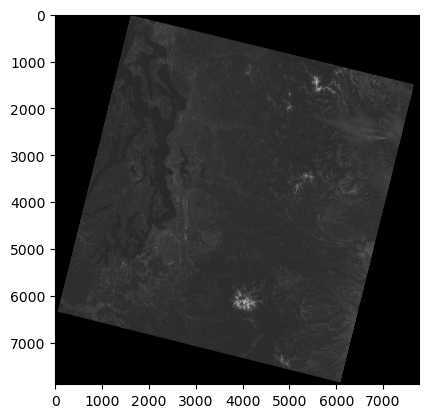

In [ ]:
#Student Exercise

* Note that the Landsat-8 image appears "rotated" relative to the axes
    * Why is this? ✍️
* Note the array coordinate system (where is the (0,0) origin)
* Interactively look at coordinates and the digital number (DN) values as you move your mouse over the image
    * The DN is the unsigned integer value, but not yet a calibrated surface reflectance value (which would have dimensionless values over the range 0.0-1.0)
    * Check DN values over Mt. Rainier, Puget Sound, and the outer "black" border

In [ ]:
#Student Exercise

#Student Exercise

## Part 2: Histograms, NoData and Masked Arrays

### Create a histogram plot of raster values in your array
* Does the matplotlib `hist()` expect a 2D array or a 1D array?
    * Remember to use the NumPy `ravel()` function on your array when passing to `hist()`!
* Make sure you use enough bins!  Try at least ~200.
* 🤔 Which bin has the highest count of pixels?
* 🤔 Over what range do most of the raster values fall?
    * Is this consistent with the original 12-bit sensor bit depth (2^12 possible values) and 16-bit integer data type (2^16 possible values)?

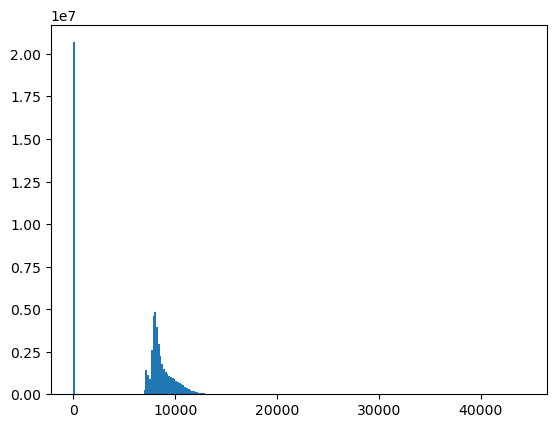

In [ ]:
#Student Exercise

In [ ]:
src.nodata

0.0

### Let's get rid of that black border (nodata values)
* The Level-2 Landsat-8 images have a `nodata` value set in the image metadata, but we did not use this when reading
* As a result, the 0 values around the margins are considered "valid" pixels, and these appear black in our grayscale color ramp
* We have a few options to deal with missing data (read through both before starting):
    1. Set values of 0 to `np.nan`
        * Remember that `np.nan` is a special `float` object, so for this approach, you must first convert the entire array using `astype(float)`
            * This means we unnecessarily increase the amount of RAM required to store the same `UInt16` (2 byte) image DN values by a factor of 2x or 4x, as each `float32` value occupies 4 bytes, and the default NumPy `float` is actually `float64` or 8 bytes!  This increased memory requirement can be a real issue for large arrays. 
            * For this reason, I suggest that you work with masked arrays (Option 2) for rasters with integer data types and nodata defined.
        * Note that there are a growing number of "nan-aware" functions in NumPy (e.g., np.nanpercentile), but still limitations
        * Note that some packages like Pandas and xarray don't currently support masked ararys, but rely on `np.nan` for missing values
    2. Use a NumPy masked array (should be simple one-liner)
        * Take a few minutes to read about masked arrays
            * https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#what-is-a-masked-array
            * https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html
            * Masked arrays allow for masking invalid values on any datatype (like `Byte` or `UInt16`)
                * Stores the mask as an additoinal 1-bit boolean array
        * See the `masked_equal` function to create a masked array from an existing array 
    3. Use the `masked=True` option when reading a band from the rasterio dataset (with NoData properly set)
        * For example `r = src.read(1, masked=True)`
        * More info on rasterio nodata handling and more advanced masking support: https://rasterio.readthedocs.io/en/latest/topics/masks.html

### Prepare a masked array for the red band using one of the approaches above
* Preview your new array, inspect the mask
* Try plotting the masked array with imshow using the `gray` cmap
    * You should no longer see a black border around the valid pixels

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

### Replot the histogram of your masked array
* Remember to use the new masked array object method `compressed()` to pass the unmasked values as a 1D array to `hist()`
* There should no longer be a spike for the 0 bin
* Experiment with `log=True` to the `hist` call to display logarithmic y axis for the bin counts

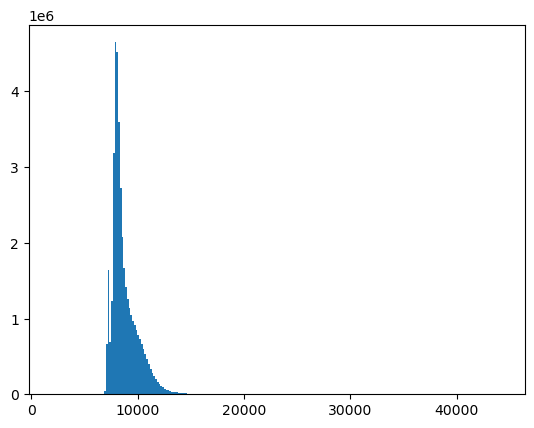

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

## Scale the 16-bit values to geophysical variables - surface reflectance
* We want to multiply the masked array values by the known scaling factor and then add the known offset value - these are provided by the Landsat project
    * See conversion factors here: https://www.usgs.gov/landsat-missions/landsat-collection-2-level-2-science-products
    * https://www.usgs.gov/faqs/how-do-i-use-scale-factor-landsat-level-2-science-products
* Store the output as a separate array 
* Unitless surface reflectance values are from 0.0 to 1.0
* Sanity check with a histogram

In [ ]:
#Surface Reflectance 0.0000275 + -0.2
sr_scale = 0.0000275
sr_offset = -0.2

In [ ]:
#Student Exercise

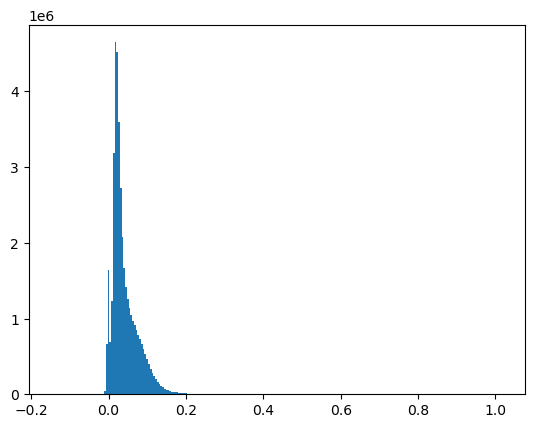

In [ ]:
#Student Exercise

### Print the min and max values of the original, masked, and scaled arrays
* Note that 0 is no longer the minimum in the scaled values for the masked array

In [ ]:
#Student Exercise

### Determine 2nd and 98th percentile of surface reflectance values
* These percentile values can be used to automatically set the `vmin` and `vmax` when plotting (e.g., in QGIS)
* Note that if you're using a masked array, you will need to isolate unmasked values using the `compressed()` method before passing to regular NumPy functions like `np.percentile`
* Plot these as vertical dotted black lines on a histogram
    * Hopefully this helps visualize what these percentile values represent based on your distribution.

[-0.002605  0.134785]


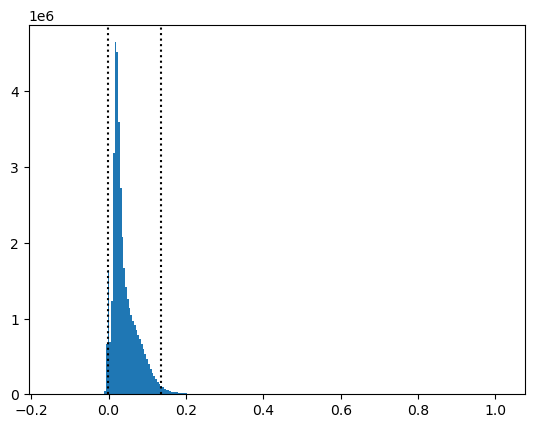

In [ ]:
#Student Exercise

## Part 3: Raster transform
* Inspect the dataset `transform` attribute
* Review this: https://rasterio.readthedocs.io/en/stable/topics/georeferencing.html?highlight=affine#coordinate-transformation

In [ ]:
#Student Exercise

Affine(30.0, 0.0, 473685.0,
       0.0, -30.0, 5373615.0)

### In your own words, what does this thing do? ✍️

In [ ]:
#Student Exercise

### Calculate corner coordinates
* Use the transform to calculate the projected coordinates of the array corners
* Use the rasterio dataset `bounds` attribute to get the "truth" (you already did this)
* Creating tuples of array corner pixel coordinates (e.g. `[(0,0), (array.shape[1], 0), ...]`
    * Useful to think of corners as upper left, upper right, lower right, lower left
    * *Careful about mixing (rows, columns) and (x, y) coordinates!*
    * I recommend you draw a quick sketch for this exercise
* Use the affine transformation to convert to projected coordinates
    * This should be pretty easy to do - can directly multiply the Affine transform by the (x,y) coordinate tuple

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

array([[   0,    0],
       [   0, 7891],
       [7771,    0],
       [7771, 7891]])

In [ ]:
#Student Exercise

array([[ 473685., 5373615.],
       [ 473685., 5136885.],
       [ 706815., 5373615.],
       [ 706815., 5136885.]])

I'm showing the above coordinates as arrays, but you can work with each corner individually

### Compute total dimensions of the projected raster dataset in km
* Use the coordinates for your corners
* Sanity check! Look up the actual LS-8 image footprint dimensions in km - make sure your calculated values are somewhat consistent. They may be different due to projection!

In [ ]:
#Student Exercise

### Determine the array indices (row, column) of the center pixel in the image
* Try to use array attributes (like `shape`) here, instead of hardcoding values
* Note that we have an odd number of rows and columns in this array, so may need to round to nearest integer values

In [ ]:
#Student Exercise

### Determine the surface reflectance value at this center pixel using array indexing
* Don't overthink this, just extract a value from the numpy array for the (row, col) indices you determined
    * You've done this kind of thing before, (e.g., `myarray[0,0]`)
* Make sure you are using integer values here (may need to convert/round), or NumPy will return an `IndexError`
* Do a sanity check on an interactive `imshow` plot to check values near the center of the image

In [ ]:
#Student Exercise

### Determine the projected coordinates (meters in UTM 10N) of the center pixel
* Review the rasterio dataset `xy` method: https://rasterio.readthedocs.io/en/latest/api/rasterio.transform.html#rasterio.transform.TransformMethodsMixin.xy
    * Careful about the order of your row and column indices
* Sanity check the resulting projected coordinates with rasterio dataset `index` method - this should return your (row, col) indices
    * https://rasterio.readthedocs.io/en/latest/api/rasterio.transform.html#rasterio.transform.TransformMethodsMixin.index
    * These may be rounded to nearest integer
* These two functions allow you to go back and forth between the array coordiantes and the projected coordinate system!

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

### Extra Credit: sample the rasterio dataset (exctract the raster value) using these projected coordinates
* This doesn't require reading the array, but can be run on the src dataset for a list of (x,y) coordiantes
* See https://rasterio.readthedocs.io/en/latest/api/rasterio.sample.html
* Note that this will return an iterable generator, so will need to evaluate (can encompass in `list()` operator)
* The resulting DN value should be similar to the value you extracted directly from the array

In [ ]:
#Student Exercise

In [ ]:
#Student Exercise

### Now, apply what you've learned!
What is the raster value at the following projected coordinates:
* (522785.0, 5323315.0)
* (`src.bounds.left + 50000`, `src.bounds.top - 50000`)

In [ ]:
#Student Exercise

522785.0 5323315.0
1676 1636


0.017524999999999985

In [ ]:
#Student Exercise

## Part 4: Raster visualization with real-world coordinates and scalebar

### Extract the full-image `extent` in projected coordinates to pass to matplotlib `imshow`
* Start with the rasterio dataset bounds
* See doc on imshow `extent` parameter here: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
* Note that the matplotlib `extent` is similar to the rasterio `bounds`, but not identical!
    * Be careful about ordering of bounds (left, bottom, right, top) vs. extent (min_x, max_x, min_y, max_y)!
        * Good to practice, as this comes up often when working with rasters using different tools
    * There is also the `rio.plot.plotting_extent()` convenience function to get the matplotlib `extent` for a rasterio Dataset: https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html#rasterio.plot.plotting_extent

In [ ]:
#This is rasterio bounds
src.bounds

BoundingBox(left=473685.0, bottom=5136885.0, right=706815.0, top=5373615.0)

In [ ]:
#This is matplotlib extent
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(full_extent)

[473685.0, 706815.0, 5136885.0, 5373615.0]


In [ ]:
#rasterio convenience function
full_extent = rio.plot.plotting_extent(src)
print(full_extent)

(473685.0, 706815.0, 5136885.0, 5373615.0)


### Plot the image with `imshow`, but now pass in this `extent` as an argument
* Note how the axes coordinates change
    * These should now be meters in the UTM 10N coordinate system of the projected image!

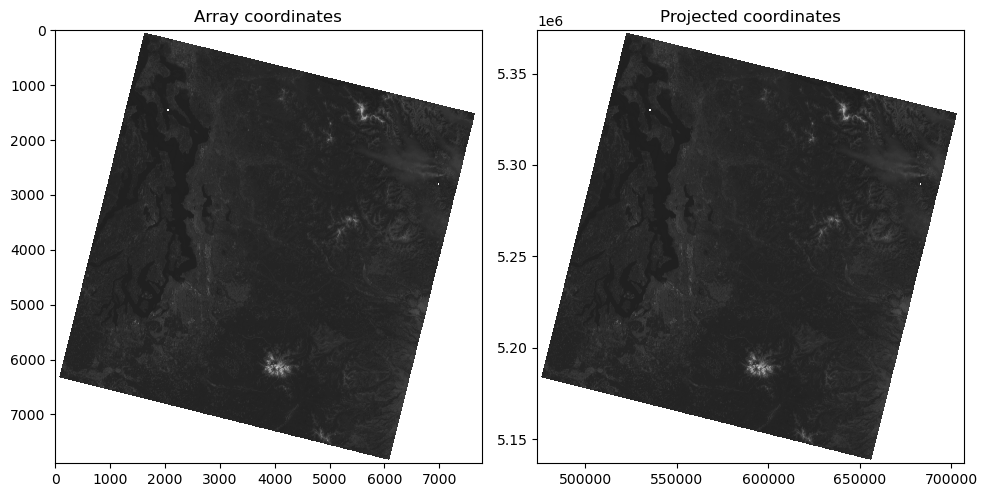

In [ ]:
#Student Exercise

### Add a dynamic scalebar to the above plot
* We will use the `matplotlib-scalebar` package for this
* See documentation: https://github.com/ppinard/matplotlib-scalebar
> The constructor arguments dx and units specify the pixel dimension. For example scalebar = ScaleBar(0.2, 'um') indicates that each pixel is equal to 0.2 micrometer. If the the axes image has already been calibrated by setting its extent, set dx to 1.0.
    * In other words:
        * For imshow using array coordinates (without defining `extent`), use `ax.add_artist(ScaleBar(res))` where `res` is the pixel resolution in meters
        * For imshow using projected coordinates with `extent` defined, use `ax.add_artist(ScaleBar(1.0))` because one unit in the axes coordinate system is equal to 1 m
* Note that you can control the location of the scalebar with the `location` keyword argument, passed to the `ScaleBar()` constructor: https://github.com/ppinard/matplotlib-scalebar#location
* If using interactive matplotlib backend, note what happens to the scalebar when you zoom

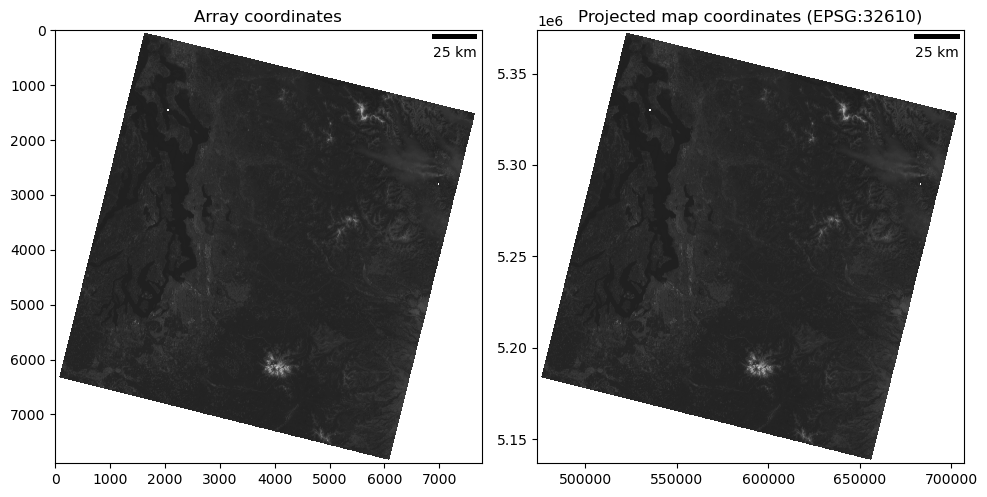

In [ ]:
#Student Exercise

## Part 5: Raster window extraction

### Review: array indexing
* We could continue our analysis with the full images, but for many science and engineering applications, we only care about a small subset of a raster at any given time
* It's also a good practice to prototype new workflows using a small subset of data
    * Less memory usage, much faster processing, faster debugging
    * Remember this for your project!  Don't start with full-resolution raster data.
* One way to accomplish this might be to extract a portion of the large array using slicing/striding (see the Lab03 NumPy section)
    * Maybe a good time to review https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding
* To extract a 1024x1024 px chunk of the full-size array, we could do something like:

In [ ]:
r_sr.shape

(7891, 7771)

In [ ]:
chunk = r_sr[3000:4024,3000:4024]

In [ ]:
chunk.shape

(1024, 1024)

### Extra Credit: extract a 256x256 pixel window around the center pixel of the array
* You already determined the center pixel indices earlier
* You'll need to define the appropriate slices for both rows and columns
    * Use variables to define window dimensions, rather than hardcoding 256 or 128
* Preview the resulting 256x256 pixel array with imshow

In [ ]:
#Student Exercise

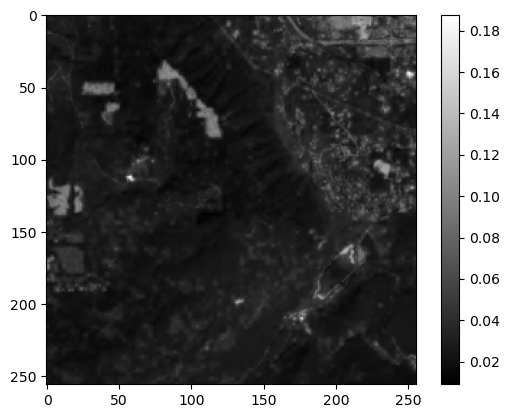

In [ ]:
#Student Exercise

## Nice Job! 
* Save this notebook, then `git add` and `git commit`
* Shut down the kernel to free RAM
* Proceed to Notebook #2!
    * We will explore the with rasterio `window` functionality to extract windows directly from the original tif files, then do all kinds of cool raster analysis with the resulting arrays

In [ ]:
#Student Exercise